# 工业质检介绍

产品质量不稳定的问题一直困扰着我国许多传统制造业企业，而传统的质量管理手段如六西格玛等，实际执行时需要大量的人力资源、管理资源投入进行保障，并且，只是降低问题发生的概率，并不能够完全杜绝质量问题发生。近年来，随着我国人力资源成本逐年升高，以及国内外宏观环境的影响，传统制造企业面临的转型升级压力越来越大。

随着人工智能和计算机视觉等技术突飞猛进，诞生了工业质检的应用场景，如果能够将这些技术应用于各行各业，尤其是半导体、纺织、快速消费品等质量要求严格或劳动强度大的行业，将创造巨大的商业价值。

本文聚焦于纺织行业的布匹疵点智能检测场景，使用PaddleDetection中CascadeRCNN和YOLOv3的增强模型进行训练、预测，大幅提升预测速度，并提供了多种模型部署方式，使模型具备在工业场景的落地能力，以期为各种工业质检场景提供解决方案示例。

## 关于本项目

> 针对项目还存在的改进空间，以及模型的落地部署实现，希望大家多交流观点、介绍经验，共同学习进步。[个人主页](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/90149)

# 数据集介绍
[2019广东工业智造创新大赛【赛场一】](https://tianchi.aliyun.com/competition/entrance/231748/information)初赛数据集

In [ ]:
!unzip data/data11768/guangdong1_round1_train1_20190818.zip -d data/
!unzip data/data11768/guangdong1_round1_testA_20190818.zip -d data/

## 文件夹目录结构

a) 文件夹结构：
- defect Images
- normal Images
- Annotations
- README.md

b) defect Images : 存放有瑕疵的图像数据，normal Images存放无疵点的图像数据，jpeg编码图像文件。

c) Annotations : 存放属性标签标注数据。

d) README.md：对数据的详细介绍。

## 标注格式说明

训练集的标注文件在Annotations文件下的json文件中，数据标注格式如下：

```
[
    {
        "name": "454343f838a44f1a0933117242.jpg",
        "defect_name": "\u65ad\u6c28\u7eb6",
        "bbox": [
            2347.4,
            194.92,
            2364.01,
            229.81
        ]
    },
    {
        "name": "454343f838a44f1a0933117242.jpg",
        "defect_name": "\u65ad\u6c28\u7eb6",
        "bbox": [
            1646.51,
            598.38,
            1672.07,
            623.94
        ]
    },
    ... ...
    ,
        {
        "name": "6cd07cf38d7b71371204456502.jpg",
        "defect_name": "\u4e09\u4e1d",
        "bbox": [
            2258.05,
            105.49,
            2274.48,
            169.38
        ]
    }
]
```

#### 格式说明

1.json文件中包含多个疵点样本，每个疵点样本都包含name、defect_name、bbox三个字段。

2.name字段为训练图片的文件名；defect_name字段为该疵点详细的疵点名称；bbox为xyxy格式坐标框；

3.对于存在多个疵点的图片，在标注文件中依次列出了每个疵点样本；

4.normal Images中的图片无疵点图片，没有在标注文件中出现。

5.defect_name字段中的疵点名称，是疵点的**中文名称**，编码格式为unicode。与要求提交结果文件中的category字段的映射关系如下。

## 疵点名称对应的category id

| 类别名      | 无疵点 | 破洞 | 水渍 | 油渍 | 污渍 | 三丝 | 结头 | 花板跳 | 百脚 | 毛粒 |
| ----------- | ------ | ---- | ---- | ---- | ---- | ---- | ---- | ------ | ---- | ---- |
| category id | 0      | 1    | 2    | 2    | 2    | 3    | 4    | 5      | 6    | 7    |

| 类别名      | 粗经 | 松经 | 断经 | 吊经 | 粗维 | 纬缩 | 浆斑 | 整经结 | 星跳 | 跳花 |
| ----------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ------ | ---- | ---- |
| category id | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15     | 16   | 16   |

| 类别名      | 断氨纶 | 稀密档 | 浪纹档 | 色差档 | 磨痕 | 轧痕 | 修痕 | 烧毛痕 | 死皱 | 云织 |
| ----------- | ------ | ------ | ------ | ------ | ---- | ---- | ---- | ------ | ---- | ---- |
| category id | 17     | 18     | 18     | 18     | 19   | 19   | 19   | 19     | 20   | 20   |

| 类别名      | 双纬 | 双经 | 跳纱 | 筘路 | 纬纱不良 |      |      |      |      |      |
| ----------- | ---- | ---- | ---- | ---- | -------- | ---- | ---- | ---- | ---- | ---- |
| category id | 20   | 20   | 20   | 20   | 20       |      |      |      |      |      |

# 拉取模型库

## PaddleClas模型库
主要是做抠图分类用

In [ ]:
!git clone https://gitee.com/paddlepaddle/PaddleClas.git

Cloning into 'PaddleClas'...
remote: Enumerating objects: 3418, done.
remote: Counting objects: 100% (3418/3418), done.
remote: Compressing objects: 100% (1571/1571), done.
remote: Total 3418 (delta 2185), reused 2846 (delta 1786), pack-reused 0
Receiving objects: 100% (3418/3418), 25.25 MiB | 2.94 MiB/s, done.
Resolving deltas: 100% (2185/2185), done.
Checking connectivity... done.


In [ ]:
!pip install -r PaddleClas/requirements.txt

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
     |████████████████████████████████| 184kB 10.4MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 49.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 30.4MB/s eta 0:00:01
     |████████████████████████████████| 8.6MB 202kB/s eta 0:00:011
  Created wheel for hdfs: filename=hdfs-2.5.8-cp37-none-any.whl size=33214 sha256=efbe265292cf79642b6de5f545ec8ba52ff191fa982b6866f140c6e2ab464e6d
  Stored in directory: /home/aistudio/.cache/pip/wheels/35/91/05/ed325f80520cc72b4eaa7327f96358c62d84afd098625ed2bd
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=0033dd6515f189b4c154ead002146d68f11c729561f040c45bf3a2317638182e
  Stored in directory: /home/aistudio/.cache/pip/wheels/78/da/5a/be54433e626178926da00dbc53e06294ba87ec2c37dded83b4
Successfully built hdfs docopt
ERROR: visualdl 2.0.0b6 has requirement Pillow>=7.0.0, but you'll have pillow 6.2.0 which is incompatible.
 

## PaddleDetection模型库
因为主分支YOLO模型要求PaddlePaddle框架是2.0，所以这里不仅拉取主分支，也拉取旧的release/0.2分支

In [ ]:
# %cd work
# !git clone https://gitee.com/paddlepaddle/PaddleDetection.git
# %cd ..
# !git clone -b release/0.2 https://gitee.com/paddlepaddle/PaddleDetection.git

## 安装cocoAPI

In [ ]:
# 安装cocoAPI
!git clone https://gitee.com/tigerrouen/cocoapi.git
#if cython is not installed
#Install into global site-packages
!cd cocoapi/PythonAPI && make install
# Alternatively, if you do not have permissions or prefer
# not to install the COCO API into global site-packages
# !python cocoapi/PythonAPI/setup.py install --user

# install pycocotools to the Python site-packages
python setup.py build_ext install
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /opt/conda/envs/python35-paddle120-env/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numpy/core/include -I../common -I/opt/conda/envs/python35-paddle120-env/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleToBbox’:
../common/maskApi.c:141:31: warning: ‘xp’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       if(j%2==0) xp=x; else if(xp<x) { ys=0; ye=h-1; }
                               ^


In [ ]:
!pip install -r PaddleDetection/requirements.txt

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
     \ 20kB 28kB/ss
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for docstring-parser: filename=docstring_parser-0.3-cp37-none-any.whl size=10439 sha256=c82774206595728c1aab598ecbe33d44c26eb9d6a9d69fc5eff86a9cc13ab73e
  Stored in directory: /tmp/pip-ephem-wheel-cache-zo7764xs/wheels/49/9d/43/6afaa63d882e3d54f95a171a042e0fdd2f045c824898c4034c
Successfully built docstring-parser


In [ ]:
!pip install kmeans

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
  Created wheel for kmeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=12018 sha256=5a978d567a81d9ffff69d815476fa0dce279f442f9da2864a45811228cd46768
  Stored in directory: /home/aistudio/.cache/pip/wheels/d3/bd/96/a294ddb65e9c1d20ef899625ebbd91ecae91c73ccb409b9306
Successfully built kmeans


# 加载工具库

In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os, sys, zipfile
import urllib.request
import shutil
import random
import numpy as np
from tqdm import tqdm
import cv2
import kmeans

# 数据集准备
- 参考竞赛页置顶notebook并稍作修改，手动划分10%的图片作为验证集
- [训练集标注文件转换为COCO格式[ 2019广东工业智造创新大赛【赛场一】]](https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.6ac039a9FjGQVq&postId=71169)

## coco格式转换

**将数据集转为飞桨模型库中的coco格式，需要划分验证集**
  ```
  data/coco/
  ├── annotations
  │   ├── instances_train2014.json
  │   ├── instances_train2017.json
  │   ├── instances_val2014.json
  │   ├── instances_val2017.json
  |   ...
  ├── train2017
  │   ├── 000000000009.jpg
  │   ├── 000000580008.jpg
  |   ...
  ├── val2017
  │   ├── 000000000139.jpg
  │   ├── 000000000285.jpg
  |   ...
  ``` 

In [ ]:
defect_name2label = {
    '破洞': 1, '水渍': 2, '油渍': 2, '污渍': 2, '三丝': 3, '结头': 4, '花板跳': 5, '百脚': 6, '毛粒': 7,
    '粗经': 8, '松经': 9, '断经': 10, '吊经': 11, '粗维': 12, '纬缩': 13, '浆斑': 14, '整经结': 15, '星跳': 16, '跳花': 16,
    '断氨纶': 17, '稀密档': 18, '浪纹档': 18, '色差档': 18, '磨痕': 19, '轧痕': 19, '修痕': 19, '烧毛痕': 19, '死皱': 20, '云织': 20,
    '双纬': 20, '双经': 20, '跳纱': 20, '筘路': 20, '纬纱不良': 20,
}
# defect_name2label = {
#     '破洞': 1, '水渍': 2, '油渍': 3, '污渍': 4, '三丝': 5, '结头': 6, '花板跳': 7, '百脚': 8, '毛粒': 9,
#     '粗经': 10, '松经': 11, '断经': 12, '吊经': 13, '粗维': 14, '纬缩': 15, '浆斑': 16, '整经结': 17, '星跳': 18, '跳花': 19,
#     '断氨纶': 20, '稀密档': 21, '浪纹档': 22, '色差档': 23, '磨痕': 24, '轧痕': 25, '修痕': 26, '烧毛痕': 27, '死皱': 28, '云织': 29,
#     '双纬': 30, '双经': 31, '跳纱': 32, '筘路': 33, '纬纱不良': 34,
# }

## 创建coco格式训练集

In [ ]:
class Fabric2COCO:

    def __init__(self,mode="train2017"):
    # def __init__(self,mode="val"):
        self.images = []
        self.annotations = []
        self.categories = []
        self.img_id = 0
        self.ann_id = 0
        self.mode =mode
        # if not os.path.exists("coco/images/{}".format(self.mode)):
        #     os.makedirs("coco/images/{}".format(self.mode))
        if not os.path.exists("PaddleDetection/dataset/coco/{}".format(self.mode)):
            os.makedirs("PaddleDetection/dataset/coco/{}".format(self.mode))

    def to_coco(self, anno_file,img_dir):
        self._init_categories()
        anno_result= pd.read_json(open(anno_file,"r"))
        anno_result = anno_result.head(int(anno_result['name'].count()*0.9))
        # anno_result = anno_result.tail(int(anno_result['name'].count()*0.1)+1)        
        name_list=anno_result["name"].unique()
        for img_name in name_list:
            img_anno = anno_result[anno_result["name"] == img_name]
            bboxs = img_anno["bbox"].tolist()
            defect_names = img_anno["defect_name"].tolist()
            assert img_anno["name"].unique()[0] == img_name

            img_path=os.path.join(img_dir,img_name)
            # img =cv2.imread(img_path)
            # h,w,c=img.shape
            h,w=1000,2446
            self.images.append(self._image(img_path,h, w))

            self._cp_img(img_path)

            for bbox, defect_name in zip(bboxs, defect_names):
                label= defect_name2label[defect_name]
                annotation = self._annotation(label, bbox)
                self.annotations.append(annotation)
                self.ann_id += 1
            self.img_id += 1
        instance = {}
        instance['info'] = 'fabric defect'
        instance['license'] = ['none']
        instance['images'] = self.images
        instance['annotations'] = self.annotations
        instance['categories'] = self.categories
        return instance

    def _init_categories(self):
        for v in range(1,21):
            print(v)
            category = {}
            category['id'] = v
            category['name'] = str(v)
            category['supercategory'] = 'defect_name'
            self.categories.append(category)
        # for k, v in defect_name2label.items():
        #     category = {}
        #     category['id'] = v
        #     category['name'] = k
        #     category['supercategory'] = 'defect_name'
        #     self.categories.append(category)

    def _image(self, path,h,w):
        image = {}
        image['height'] = h
        image['width'] = w
        image['id'] = self.img_id
        image['file_name'] = os.path.basename(path)
        return image

    def _annotation(self,label,bbox):
        area=(bbox[2]-bbox[0])*(bbox[3]-bbox[1])
        points=[[bbox[0],bbox[1]],[bbox[2],bbox[1]],[bbox[2],bbox[3]],[bbox[0],bbox[3]]]
        annotation = {}
        annotation['id'] = self.ann_id
        annotation['image_id'] = self.img_id
        annotation['category_id'] = label
        annotation['segmentation'] = [np.asarray(points).flatten().tolist()]
        annotation['bbox'] = self._get_box(points)
        annotation['iscrowd'] = 0
        annotation['area'] = area
        return annotation

    def _cp_img(self, img_path):
        shutil.copy(img_path, os.path.join("PaddleDetection/dataset/coco/{}".format(self.mode), os.path.basename(img_path)))
        # shutil.copy(img_path, os.path.join("coco/images/{}".format(self.mode), os.path.basename(img_path)))
    def _get_box(self, points):
        min_x = min_y = np.inf
        max_x = max_y = 0
        for x, y in points:
            min_x = min(min_x, x)
            min_y = min(min_y, y)
            max_x = max(max_x, x)
            max_y = max(max_y, y)
        '''coco,[x,y,w,h]'''
        return [min_x, min_y, max_x - min_x, max_y - min_y]
    def save_coco_json(self, instance, save_path):
        import json
        with open(save_path, 'w') as fp:
            json.dump(instance, fp, indent=1, separators=(',', ': '))

In [ ]:
'''转换有瑕疵的样本为coco格式'''
img_dir = "data/guangdong1_round1_train1_20190818/defect_Images"
anno_dir="data/guangdong1_round1_train1_20190818/Annotations/anno_train.json"
fabric2coco = Fabric2COCO()
train_instance = fabric2coco.to_coco(anno_dir,img_dir)
if not os.path.exists("PaddleDetection/dataset/coco/annotations/"):
    os.makedirs("PaddleDetection/dataset/coco/annotations/")
fabric2coco.save_coco_json(train_instance, "PaddleDetection/dataset/coco/annotations/"+'instances_{}.json'.format("train2017"))
# fabric2coco.save_coco_json(train_instance, "coco/annotations/"+'instances_{}.json'.format("val"))

## 创建coco格式验证集

In [ ]:
class Fabric2COCO:

    def __init__(self,mode="val2017"):
        self.images = []
        self.annotations = []
        self.categories = []
        self.img_id = 0
        self.ann_id = 0
        self.mode =mode
        # if not os.path.exists("coco/images/{}".format(self.mode)):
        #     os.makedirs("coco/images/{}".format(self.mode))
        if not os.path.exists("PaddleDetection/dataset/coco/{}".format(self.mode)):
            os.makedirs("PaddleDetection/dataset/coco/{}".format(self.mode))

    def to_coco(self, anno_file,img_dir):
        self._init_categories()
        anno_result= pd.read_json(open(anno_file,"r"))
        anno_result = anno_result.tail(int(anno_result['name'].count()*0.1)+1)        
        name_list=anno_result["name"].unique()
        for img_name in name_list:
            img_anno = anno_result[anno_result["name"] == img_name]
            bboxs = img_anno["bbox"].tolist()
            defect_names = img_anno["defect_name"].tolist()
            assert img_anno["name"].unique()[0] == img_name

            img_path=os.path.join(img_dir,img_name)
            # img =cv2.imread(img_path)
            # h,w,c=img.shape
            h,w=1000,2446
            self.images.append(self._image(img_path,h, w))

            self._cp_img(img_path)

            for bbox, defect_name in zip(bboxs, defect_names):
                label= defect_name2label[defect_name]
                annotation = self._annotation(label, bbox)
                self.annotations.append(annotation)
                self.ann_id += 1
            self.img_id += 1
        instance = {}
        instance['info'] = 'fabric defect'
        instance['license'] = ['none']
        instance['images'] = self.images
        instance['annotations'] = self.annotations
        instance['categories'] = self.categories
        return instance

    def _init_categories(self):
        for v in range(1,21):
            print(v)
            category = {}
            category['id'] = v
            category['name'] = str(v)
            category['supercategory'] = 'defect_name'
            self.categories.append(category)
        # for k, v in defect_name2label.items():
        #     category = {}
        #     category['id'] = v
        #     category['name'] = k
        #     category['supercategory'] = 'defect_name'
        #     self.categories.append(category)

    def _image(self, path,h,w):
        image = {}
        image['height'] = h
        image['width'] = w
        image['id'] = self.img_id
        image['file_name'] = os.path.basename(path)
        return image

    def _annotation(self,label,bbox):
        area=(bbox[2]-bbox[0])*(bbox[3]-bbox[1])
        points=[[bbox[0],bbox[1]],[bbox[2],bbox[1]],[bbox[2],bbox[3]],[bbox[0],bbox[3]]]
        annotation = {}
        annotation['id'] = self.ann_id
        annotation['image_id'] = self.img_id
        annotation['category_id'] = label
        annotation['segmentation'] = [np.asarray(points).flatten().tolist()]
        annotation['bbox'] = self._get_box(points)
        annotation['iscrowd'] = 0
        annotation['area'] = area
        return annotation

    def _cp_img(self, img_path):
        shutil.copy(img_path, os.path.join("PaddleDetection/dataset/coco/{}".format(self.mode), os.path.basename(img_path)))
        # shutil.copy(img_path, os.path.join("coco/images/{}".format(self.mode), os.path.basename(img_path)))
    def _get_box(self, points):
        min_x = min_y = np.inf
        max_x = max_y = 0
        for x, y in points:
            min_x = min(min_x, x)
            min_y = min(min_y, y)
            max_x = max(max_x, x)
            max_y = max(max_y, y)
        '''coco,[x,y,w,h]'''
        return [min_x, min_y, max_x - min_x, max_y - min_y]
    def save_coco_json(self, instance, save_path):
        import json
        with open(save_path, 'w') as fp:
            json.dump(instance, fp, indent=1, separators=(',', ': '))

In [ ]:
'''转换有瑕疵的样本为coco格式'''
img_dir = "data/guangdong1_round1_train1_20190818/defect_Images"
anno_dir="data/guangdong1_round1_train1_20190818/Annotations/anno_train.json"
fabric2coco = Fabric2COCO()
train_instance = fabric2coco.to_coco(anno_dir,img_dir)
if not os.path.exists("PaddleDetection/dataset/coco/annotations/"):
    os.makedirs("PaddleDetection/dataset/coco/annotations/")
fabric2coco.save_coco_json(train_instance, "PaddleDetection/dataset/coco/annotations/"+'instances_{}.json'.format("val2017"))

## 整理后最终文件目录格式

  ```
  ./coco/
  ├── annotations
  │   ├── instances_train2014.json
  │   ├── instances_train2017.json
  |   ...
  ├── train2017
  │   ├── 5cac654fb8e699da1546312852.jpg
  │   ├── 14d68415c6f020021536006312.jpg
  |   ...
  ├── val2017
  │   ├── 6cf97c00f1a180120939190444.jpg
  │   ├── cb42508af46ed0a50817439434.jpg
  |   ...

## 生成分类训练数据集

In [ ]:
def get_annotations(datadir, mode="train"):
    """获取瑕疵标注信息"""
    if mode == "train":
        ann_file = 'instances_train2017.json'
    else:
        ann_file = 'instances_val2017.json'
    with open(os.path.join(datadir, 'annotations', ann_file) ) as f:
        json_file = json.load(f)  
        records = []
        for objs in json_file['annotations']:
            # print(objs)
            box = []
            label = []
            bbox = objs['bbox']
            # print(bbox)
            # print(objs['image_id'])
            x1 = int(bbox[0])
            y1 = int(bbox[1])
            x2 = int(bbox[0] + bbox[2])
            y2 = int(bbox[1] + bbox[3])
            box.append([x1, y1, x2, y2])
            # 这里有个问题，因为分类训练的label是从0开始算的，所以需要将原始值减去1
            objs['category_id'] = objs['category_id'] - 1
            label.append(objs['category_id'])
            for img in json_file['images']:
                if img['id'] == objs['image_id']:
                    # print(img)
                    img_file = img['file_name']
                    # 缺陷id是唯一的，保证不会重复
                    fid = objs['id']
            voc_rec = {
                'im_file': img_file,
                'im_id': fid,
                'gt_class': label,
                'gt_bbox': box
                }
            records.append(voc_rec)
            f.close()
    return records


def generate_data(datadir, save_dir, records, mode="train"):
    im_out = []
    if mode == "train":
        images_dir = 'train2017'
    else:
        images_dir = 'val2017'
    for record in tqdm(records):
        img = cv2.imread(os.path.join(datadir, images_dir, record["im_file"]))
        # img = imageio.imread(os.path.join(datadir, images_dir, record["im_file"]))
        ffile = record["im_file"][:-4]
        fid = record["im_id"]
        box = record["gt_bbox"][0]
        fl = record["gt_class"][0]
        # print(fl)
        # print(box)
        # print(img)
        # print(box[1])
        im = img[box[1]: box[3], box[0]: box[2]]
        fname = '{}/{}/{}_{}.jpg'.format(save_dir, mode, str(ffile), str(fid))
        cv2.imwrite(fname, im)
        outname = '{}/{}_{}.jpg'.format(mode, str(ffile), str(fid))
        im_out.append("{} {}".format(outname, fl))

    with open("{}/{}_list.txt".format(save_dir,mode), "w") as f:
        f.write("\n".join(im_out))
        f.close()

In [ ]:
%mkdir PaddleClas/dataset/coco
%mkdir PaddleClas/dataset/coco/train
%mkdir PaddleClas/dataset/coco/val

In [ ]:
save_dir = "PaddleClas/dataset/coco"
coco_dir = "PaddleDetection/dataset/coco"
train_records = get_annotations(coco_dir, "train")
generate_data(coco_dir, save_dir, train_records, "train")
val_records = get_annotations(coco_dir, "val")
generate_data(coco_dir, save_dir, val_records, "val")

100%|██████████| 773/773 [00:33<00:00, 23.13it/s]


# 数据集相关计算

## 计算RGB通道的均值和标准差

In [ ]:
"""
计算RGB通道的均值和标准差
"""

def compute(path):
    file_names = os.listdir(path)
    per_image_Rmean = []
    per_image_Gmean = []
    per_image_Bmean = []
    per_image_Rstd = []
    per_image_Gstd = []
    per_image_Bstd = []
    for file_name in file_names:
        img = cv2.imread(os.path.join(path, file_name), 1)
        per_image_Rmean.append(np.mean(img[:, :, 0]))
        per_image_Gmean.append(np.mean(img[:, :, 1]))
        per_image_Bmean.append(np.mean(img[:, :, 2]))
        per_image_Rstd.append(np.std(img[:, :, 0]))
        per_image_Gstd.append(np.std(img[:, :, 1]))
        per_image_Bstd.append(np.std(img[:, :, 2]))
    R_mean = np.mean(per_image_Rmean)/255.0
    G_mean = np.mean(per_image_Gmean)/255.0
    B_mean = np.mean(per_image_Bmean)/255.0
    R_std = np.mean(per_image_Rstd)/255.0
    G_std = np.mean(per_image_Gstd)/255.0
    B_std = np.mean(per_image_Bstd)/255.0
    image_mean = [R_mean, G_mean, B_mean]
    image_std = [R_std, G_std, B_std]
    return image_mean, image_std

In [ ]:
image_mean, image_std = compute('PaddleClas/dataset/coco/train')
print('bboxes train set image_mean and image_std:', image_mean, image_std)
# [0.3915672743651235, 0.3659221073413657, 0.3658356224302539] 
# [0.10842955766145725, 0.11051785458551451, 0.10201107370690816]
image_mean, image_std = compute('PaddleClas/dataset/coco/val')
print('bboxes validation set image_mean and image_std:', image_mean, image_std)
# [0.4135658375232079, 0.3829071913393303, 0.37904283407977485] 
# [0.11537134120746612, 0.11818519784654734, 0.10920973618578182]

bboxes train set image_mean and image_std: [0.3915672743651235, 0.3659221073413657, 0.3658356224302539] [0.10842955766145725, 0.11051785458551451, 0.10201107370690816]
bboxes validation set image_mean and image_std: [0.4135658375232079, 0.3829071913393303, 0.37904283407977485] [0.11537134120746612, 0.11818519784654734, 0.10920973618578182]


In [ ]:
image_mean, image_std = compute('PaddleDetection/dataset/coco/train2017')
print('train set image_mean and image_std:', image_mean, image_std)
image_mean, image_std = compute('PaddleDetection/dataset/coco/val2017')
print('validation set image_mean and image_std:', image_mean, image_std)
# output
# train set image_mean and image_std: 
    #   mean: [0.37597409304695484, 0.3486304254014788, 0.3536799056211826] 
    #   std: [0.1048299549268863, 0.10444091185913326, 0.09987538234260904]
# validation set image_mean and image_std: 
    #   mean: [0.3914940814114446, 0.3605475730949753, 0.36263685530651174]
    #   std: [0.11077973580477549, 0.10994100883809227, 0.10480770290045718]

train set image_mean and image_std: [0.37597409304695484, 0.3486304254014788, 0.3536799056211826] [0.1048299549268863, 0.10444091185913326, 0.09987538234260904]
validation set image_mean and image_std: [0.3914940814114446, 0.3605475730949753, 0.36263685530651174] [0.11077973580477549, 0.10994100883809227, 0.10480770290045718]


## Kmeans聚类计算anchor boxes

In [ ]:
def iou(box, clusters):
    """
    Calculates the Intersection over Union (IoU) between a box and k clusters.
    :param box: tuple or array, shifted to the origin (i. e. width and height)
    :param clusters: numpy array of shape (k, 2) where k is the number of clusters
    :return: numpy array of shape (k, 0) where k is the number of clusters
    """
    x = np.minimum(clusters[:, 0], box[0])
    y = np.minimum(clusters[:, 1], box[1])
    if np.count_nonzero(x == 0) > 0 or np.count_nonzero(y == 0) > 0:
        raise ValueError("Box has no area")
 
    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]
 
    iou_ = intersection / (box_area + cluster_area - intersection)
 
    return iou_
 
 
def avg_iou(boxes, clusters):
    """
    Calculates the average Intersection over Union (IoU) between a numpy array of boxes and k clusters.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param clusters: numpy array of shape (k, 2) where k is the number of clusters
    :return: average IoU as a single float
    """
    return np.mean([np.max(iou(boxes[i], clusters)) for i in range(boxes.shape[0])])
 
 
def translate_boxes(boxes):
    """
    Translates all the boxes to the origin.
    :param boxes: numpy array of shape (r, 4)
    :return: numpy array of shape (r, 2)
    """
    new_boxes = boxes.copy()
    for row in range(new_boxes.shape[0]):
        new_boxes[row][2] = np.abs(new_boxes[row][2] - new_boxes[row][0])
        new_boxes[row][3] = np.abs(new_boxes[row][3] - new_boxes[row][1])
    return np.delete(new_boxes, [0, 1], axis=1)
 
 
def kmeans(boxes, k, dist=np.median):
    """
    Calculates k-means clustering with the Intersection over Union (IoU) metric.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param k: number of clusters
    :param dist: distance function
    :return: numpy array of shape (k, 2)
    """
    rows = boxes.shape[0]
 
    distances = np.empty((rows, k))
    last_clusters = np.zeros((rows,))
 
    np.random.seed()
 
    # the Forgy method will fail if the whole array contains the same rows
    clusters = boxes[np.random.choice(rows, k, replace=False)]
 
    while True:
        for row in range(rows):
            distances[row] = 1 - iou(boxes[row], clusters)
 
        nearest_clusters = np.argmin(distances, axis=1)
 
        if (last_clusters == nearest_clusters).all():
            break
 
        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0)
 
        last_clusters = nearest_clusters
 
    return clusters

In [ ]:
CLUSTERS = 9


def load_dataset(path):
    dataset = []
    with open(os.path.join(path, 'annotations',  'instances_train2017.json')) as f:
        json_file = json.load(f) 
        for item in json_file['images']:            
            height = item['height']
            width = item['width']
            for objs in json_file['annotations']:
                if(objs['image_id'] == item['id']):
                    bbox = objs['bbox']
                    xmin = int(bbox[0]) / width
                    ymin = int(bbox[1]) / height
                    xmax = int(bbox[0] + bbox[2]) / width
                    ymax = int(bbox[1] + bbox[3]) / height
 
                    xmin = np.float64(xmin)
                    ymin = np.float64(ymin)
                    xmax = np.float64(xmax)
                    ymax = np.float64(ymax)
                    if xmax == xmin or ymax == ymin:
                        print(item['file_name'])
                    dataset.append([xmax - xmin, ymax - ymin])
        f.close()
    return np.array(dataset)
 

#print(__file__)
data = load_dataset('PaddleDetection/dataset/coco')

out = kmeans(data, k=CLUSTERS)*608
#clusters = [[10,13],[16,30],[33,23],[30,61],[62,45],[59,119],[116,90],[156,198],[373,326]]
#out= np.array(clusters)/416.0
print(out)
print("Accuracy: {:.2f}%".format(avg_iou(data, out/608) * 100))
print("Boxes:\n {}-{}".format(out[:, 0], out[:, 1]))
 
ratios = np.around(out[:, 0] / out[:, 1], decimals=2).tolist()
print("Ratios:\n {}".format(sorted(ratios)))

[[  7.70564186  31.008     ]
 [ 13.42273099  12.16      ]
 [570.46606705 141.056     ]
 [  8.69991823 594.016     ]
 [ 45.48814391  20.064     ]
 [  4.22567457  37.696     ]
 [ 36.0425184  297.312     ]
 [  5.46852003  94.24      ]
 [  4.72281276  15.2       ]]
Accuracy: 60.76%
Boxes:
 [  7.70564186  13.42273099 570.46606705   8.69991823  45.48814391
   4.22567457  36.0425184    5.46852003   4.72281276]-[ 31.008  12.16  141.056 594.016  20.064  37.696 297.312  94.24   15.2  ]
Ratios:
 [0.01, 0.06, 0.11, 0.12, 0.25, 0.31, 1.1, 2.27, 4.04]


计算结果
```python
[[  7.70564186  31.008     ]
 [ 13.42273099  12.16      ]
 [570.46606705 141.056     ]
 [  8.69991823 594.016     ]
 [ 45.48814391  20.064     ]
 [  4.22567457  37.696     ]
 [ 36.0425184  297.312     ]
 [  5.46852003  94.24      ]
 [  4.72281276  15.2       ]]
 
Accuracy: 60.76%

Boxes:
 [  7.70564186  13.42273099 570.46606705   8.69991823  45.48814391
   4.22567457  36.0425184    5.46852003   4.72281276]-[ 31.008  12.16  141.056 594.016  20.064  37.696 297.312  94.24   15.2  ]
   
Ratios:
 [0.01, 0.06, 0.11, 0.12, 0.25, 0.31, 1.1, 2.27, 4.04]
```

# 使用SENet154_vd训练分类模型

In [ ]:
%cd PaddleClas

/home/aistudio/PaddleClas


In [ ]:
%set_env CUDA_VISIBLE_DEVICES=0
%set_env FLAGS_fraction_of_gpu_memory_to_use=0.98

env: CUDA_VISIBLE_DEVICES=0
env: FLAGS_fraction_of_gpu_memory_to_use=0.98


In [ ]:
%run tools/download.py -a SENet154_vd -p ./pretrained -d True

2020-06-15 06:49:29 INFO: Downloading SENet154_vd_pretrained.tar from https://paddle-imagenet-models-name.bj.bcebos.com/SENet154_vd_pretrained.tar
100%|██████████| 477670/477670 [00:16<00:00, 29480.93KB/s]
2020-06-15 06:49:45 INFO: Decompressing ./pretrained/SENet154_vd_pretrained.tar...
2020-06-15 06:49:46 INFO: download ./pretrained/SENet154_vd_pretrained.tar finished 


In [ ]:
import os 
os.environ['PYTHONPATH']="/home/aistudio/PaddleClas"
!python -m paddle.distributed.launch --selected_gpus="0" tools/train.py -c configs/SENet/SENet154_vd.yaml

In [ ]:
!python -m paddle.distributed.launch \
    --selected_gpus="0" \
    tools/eval.py \
    -c ./configs/eval.yaml \
    -o ARCHITECTURE.name="SENet154_vd" \
    -o pretrained_model=output/SENet154_vd/100/ppcls

-----------  Configuration Arguments -----------
cluster_node_ips: 127.0.0.1
log_dir: None
node_ip: 127.0.0.1
print_config: True
selected_gpus: 0
started_port: 6170
training_script: tools/eval.py
training_script_args: ['-c', './configs/eval.yaml', '-o', 'ARCHITECTURE.name=SENet154_vd', '-o', 'pretrained_model=output/SENet154_vd/100/ppcls']
use_paddlecloud: False
------------------------------------------------
trainers_endpoints: 127.0.0.1:6170 , node_id: 0 , current_node_ip: 127.0.0.1 , num_nodes: 1 , node_ips: ['127.0.0.1'] , nranks: 1
2020-06-17 04:09:29 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2020-06-17 04:09:29 INFO: ARCHITECTURE : 
2020-06-17 04:09:29 INFO:     name : SENet154_vd
2020-06-17 04:09:29 INFO: -----------

In [ ]:
!python tools/export_model.py \
    --model="SENet154_vd" \
    --pretrained_model=output/SENet154_vd/100/ppcls \
    --output_path=output/

In [ ]:
!python tools/infer/predict.py \
    -m output/model \
    -p output/params \
    -i dataset/coco/val/ba4a62171e2a35431045167893_28.jpg \
    --use_gpu=1 \
    --use_tensorrt=False

2020-06-15 20:17:24,995-INFO: class: 17
2020-06-15 20:17:24,995-INFO: score: 0.5552724003791809


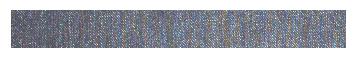

In [ ]:
img=Image.open('dataset/coco/val/ba4a62171e2a35431045167893_28.jpg')
plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.axis('off')  #去掉坐标轴
plt.imshow(img)
plt.show()

In [ ]:
!python -m paddle.distributed.launch \
    --selected_gpus="0" \
    tools/train.py \
    -c configs/Distillation/R50_vd_distill_MV3_large_x1_0.yaml

-----------  Configuration Arguments -----------
cluster_node_ips: 127.0.0.1
log_dir: None
node_ip: 127.0.0.1
print_config: True
selected_gpus: 0
started_port: 6170
training_script: tools/train.py
training_script_args: ['-c', 'configs/Distillation/R50_vd_distill_MV3_large_x1_0.yaml']
use_paddlecloud: False
------------------------------------------------
trainers_endpoints: 127.0.0.1:6170 , node_id: 0 , current_node_ip: 127.0.0.1 , num_nodes: 1 , node_ips: ['127.0.0.1'] , nranks: 1
2020-06-17 05:10:11 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2020-06-17 05:10:11 INFO: ARCHITECTURE : 
2020-06-17 05:10:11 INFO:     name : ResNet50_vd_distill_MobileNetV3_large_x1_0
2020-06-17 05:10:11 INFO: -------------------------------------

In [ ]:
!python -m paddle.distributed.launch \
    --selected_gpus="0" \
    tools/train.py \
    -c configs/EfficientNet/EfficientNetB0.yaml

In [ ]:
!python -m paddle.distributed.launch \
    --selected_gpus="0" \
    tools/eval.py \
    -c ./configs/EfficientNet/EfficientNetB0.yaml \
    -o ARCHITECTURE.name="EfficientNetB0" \
    -o pretrained_model=output/EfficientNetB0/180/ppcls

-----------  Configuration Arguments -----------
cluster_node_ips: 127.0.0.1
log_dir: None
node_ip: 127.0.0.1
print_config: True
selected_gpus: 0
started_port: 6170
training_script: tools/eval.py
training_script_args: ['-c', './configs/EfficientNet/EfficientNetB0.yaml', '-o', 'ARCHITECTURE.name=EfficientNetB0', '-o', 'pretrained_model=output/EfficientNetB0/180/ppcls']
use_paddlecloud: False
------------------------------------------------
trainers_endpoints: 127.0.0.1:6170 , node_id: 0 , current_node_ip: 127.0.0.1 , num_nodes: 1 , node_ips: ['127.0.0.1'] , nranks: 1
2020-06-17 07:28:28 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2020-06-17 07:28:28 INFO: ARCHITECTURE : 
2020-06-17 07:28:28 INFO:     name : EfficientNetB0
2020-

# 使用Cascade RCNN增强模型训练
这里使用模型库提供的rcnn_enhance解决方案
## 服务器端实用目标检测方案

### 简介

* 近年来，学术界和工业界广泛关注图像中目标检测任务。基于[PaddleClas](https://github.com/PaddlePaddle/PaddleClas)中SSLD蒸馏方案训练得到的ResNet50_vd预训练模型(ImageNet1k验证集上Top1 Acc为82.39%)，结合PaddleDetection中的丰富算子，飞桨提供了一种面向服务器端实用的目标检测方案PSS-DET(Practical Server Side Detection)。基于COCO2017目标检测数据集，V100单卡预测速度为为61FPS时，COCO mAP可达41.6%；预测速度为20FPS时，COCO mAP可达47.8%。

* 以标准的Faster RCNN ResNet50_vd FPN为例，下表给出了PSS-DET不同的模块的速度与精度收益。

| Trick | Train scale | Test scale |  COCO mAP | Infer speed/FPS |
|- |:-: |:-: | :-: | :-: |
| `baseline` | 640x640 | 640x640 | 36.4% | 43.589 |
| +`test proposal=pre/post topk 500/300` | 640x640 | 640x640 | 36.2% | 52.512 |
| +`fpn channel=64` | 640x640 | 640x640 | 35.1% | 67.450 |
| +`ssld pretrain` | 640x640 | 640x640 | 36.3% | 67.450 |
| +`ciou loss` | 640x640 | 640x640 | 37.1% | 67.450 |
| +`DCNv2` | 640x640 | 640x640 | 39.4% | 60.345 |
| +`3x, multi-scale training` | 640x640 | 640x640 | 41.0% | 60.345 |
| +`auto augment` | 640x640 | 640x640 | 41.4% | 60.345 |
| +`libra sampling` | 640x640 | 640x640 | 41.6% | 60.345 |


基于该实验结论，PaddleDetection结合Cascade RCNN，使用更大的训练与评估尺度(1000x1500)，最终在单卡V100上速度为20FPS，COCO mAP达47.8%。下图给出了目前类似速度的目标检测方法的速度与精度指标。

### 模型库

| 骨架网络             | 网络类型       | 每张GPU图片个数 | 学习率策略 |推理时间(fps) | Box AP | Mask AP |                           下载                          | 配置文件 |
| :---------------------- | :-------------:  | :-------: | :-----: | :------------: | :----: | :-----: | :-------------: | :-----: |
| ResNet50-vd-FPN-Dcnv2         | Faster     |     2     |   3x    |     61.425     |  41.6  |    -    | [model](https://paddlemodels.bj.bcebos.com/object_detection/faster_rcnn_dcn_r50_vd_fpn_3x_server_side.tar) |  [config](https://github.com/PaddlePaddle/PaddleDetection/tree/master/configs/rcnn_server_side_det/faster_rcnn_dcn_r50_vd_fpn_3x_server_side.yml) |
| ResNet50-vd-FPN-Dcnv2         | Cascade Faster     |     2     |   3x    |     20.001     |  47.8  |    -    | [model](https://paddlemodels.bj.bcebos.com/object_detection/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.tar) | [config](https://github.com/PaddlePaddle/PaddleDetection/tree/master/configs/rcnn_server_side_det/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.yml) |


对配置文件`./configs/rcnn_enhance/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.yml`做如下修改
- 修改类别数
- 修改数据集RGB通道的均值和标准差
- 使用迁移模型训练策略，调整学习率

参考配置文件示例如下
```yml
architecture: CascadeRCNN
max_iters: 270000
snapshot_iter: 30000
use_gpu: true
log_smooth_window: 200
log_iter: 200
save_dir: output
pretrain_weights: https://paddlemodels.bj.bcebos.com/object_detection/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.tar
finetune_exclude_pretrained_params: ['cls_score', 'bbox_pred']
weights: output/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/model_final
metric: COCO
num_classes: 21

CascadeRCNN:
  backbone: ResNet
  fpn: FPN
  rpn_head: FPNRPNHead
  roi_extractor: FPNRoIAlign
  bbox_head: CascadeBBoxHead
  bbox_assigner: CascadeBBoxAssigner

ResNet:
  norm_type: bn
  depth: 50
  feature_maps: [2, 3, 4, 5]
  freeze_at: 2
  variant: d
  dcn_v2_stages: [3, 4, 5]
  lr_mult_list: [0.05, 0.05, 0.1, 0.15]

FPN:
  max_level: 6
  min_level: 2
  num_chan: 64
  spatial_scale: [0.03125, 0.0625, 0.125, 0.25]

FPNRPNHead:
  anchor_generator:
    anchor_sizes: [32, 64, 128, 256, 512]
    aspect_ratios: [0.5, 1.0, 2.0]
    stride: [16.0, 16.0]
    variance: [1.0, 1.0, 1.0, 1.0]
  anchor_start_size: 32
  min_level: 2
  max_level: 6
  num_chan: 64
  rpn_target_assign:
    rpn_batch_size_per_im: 256
    rpn_fg_fraction: 0.5
    rpn_positive_overlap: 0.7
    rpn_negative_overlap: 0.3
    rpn_straddle_thresh: 0.0
  train_proposal:
    min_size: 0.0
    nms_thresh: 0.7
    pre_nms_top_n: 2000
    post_nms_top_n: 2000
  test_proposal:
    min_size: 0.0
    nms_thresh: 0.7
    pre_nms_top_n: 500
    post_nms_top_n: 300

FPNRoIAlign:
  canconical_level: 4
  canonical_size: 224
  min_level: 2
  max_level: 5
  box_resolution: 7
  sampling_ratio: 2

CascadeBBoxAssigner:
  batch_size_per_im: 512
  bbox_reg_weights: [10, 20, 30]
  bg_thresh_lo: [0.0, 0.0, 0.0]
  bg_thresh_hi: [0.5, 0.6, 0.7]
  fg_thresh: [0.5, 0.6, 0.7]
  fg_fraction: 0.25

CascadeBBoxHead:
  head: CascadeTwoFCHead
  bbox_loss: BalancedL1Loss
  nms:
    keep_top_k: 100
    nms_threshold: 0.5
    score_threshold: 0.05

BalancedL1Loss:
  alpha: 0.5
  gamma: 1.5
  beta: 1.0
  loss_weight: 1.0

CascadeTwoFCHead:
  mlp_dim: 1024

LearningRate:
  base_lr: 0.00025
  schedulers:
  - !PiecewiseDecay
    gamma: 0.1
    milestones: [180000, 240000]
  - !LinearWarmup
    start_factor: 0.1
    steps: 1000

OptimizerBuilder:
  optimizer:
    momentum: 0.9
    type: Momentum
  regularizer:
    factor: 0.0001
    type: L2

TrainReader:
  inputs_def:
    fields: ['image', 'im_info', 'im_id', 'gt_bbox', 'gt_class', 'is_crowd']
  dataset:
    !COCODataSet
    image_dir: train2017
    anno_path: annotations/instances_train2017.json
    dataset_dir: /home/aistudio/PaddleDetection/dataset/coco
  sample_transforms:
  - !DecodeImage
    to_rgb: true
  - !RandomFlipImage
    prob: 0.5
  - !AutoAugmentImage
    autoaug_type: v1
  - !NormalizeImage
    is_channel_first: false
    is_scale: true
    mean: [0.37,0.36,0.36]
    std: [0.11, 0.10,0.10]
  - !ResizeImage
    target_size: [640, 672, 704, 736, 768, 800, 832, 864, 896, 928, 960, 992, 1024]
    max_size: 1500
    interp: 1
    use_cv2: true
  - !Permute
    to_bgr: false
    channel_first: true
  batch_transforms:
  - !PadBatch
    pad_to_stride: 32
    use_padded_im_info: false
  batch_size: 16
  shuffle: true
  worker_num: 2
  use_process: false


TestReader:
  inputs_def:
    # set image_shape if needed
    fields: ['image', 'im_info', 'im_id', 'im_shape']
  dataset:
    !ImageFolder
    anno_path: annotations/instances_val2017.json
    dataset_dir: /home/aistudio/PaddleDetection/dataset/coco
  sample_transforms:
  - !DecodeImage
    to_rgb: true
    with_mixup: false
  - !NormalizeImage
    is_channel_first: false
    is_scale: true
    mean: [0.37,0.36,0.36]
    std: [0.11, 0.10,0.10]
  - !ResizeImage
    interp: 1
    max_size: 1500
    target_size: 1000
    use_cv2: true
  - !Permute
    channel_first: true
    to_bgr: false
  batch_transforms:
  - !PadBatch
    pad_to_stride: 32
    use_padded_im_info: true
  batch_size: 1
  shuffle: false



EvalReader:
  inputs_def:
    fields: ['image', 'im_info', 'im_id', 'im_shape']
    # for voc
    #fields: ['image', 'im_info', 'im_id', 'gt_bbox', 'gt_class', 'is_difficult']
  dataset:
    !COCODataSet
    image_dir: val2017
    anno_path: annotations/instances_val2017.json
    dataset_dir: /home/aistudio/PaddleDetection/dataset/coco
  sample_transforms:
  - !DecodeImage
    to_rgb: true
    with_mixup: false
  - !NormalizeImage
    is_channel_first: false
    is_scale: true
    mean: [0.37,0.36,0.36]
    std: [0.11, 0.10,0.10]
  - !ResizeImage
    interp: 1
    max_size: 1500
    target_size: 1000
    use_cv2: true
  - !Permute
    channel_first: true
    to_bgr: false
  batch_transforms:
  - !PadBatch
    pad_to_stride: 32
    use_padded_im_info: true
  batch_size: 1
  shuffle: false
  drop_empty: false
  worker_num: 2
```

In [2]:
%set_env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [3]:
%set_env FLAGS_fraction_of_gpu_memory_to_use=0.98

env: FLAGS_fraction_of_gpu_memory_to_use=0.98


In [1]:
%cd /home/aistudio/work/PaddleDetection

/home/aistudio/work/PaddleDetection


In [ ]:
# 训练时间比较长，这里演示到60000多轮
%run tools/train.py -c configs/efficientdet_d0.yml --eval

In [ ]:
# 训练时间比较长，这里演示到60000多轮
%run tools/train.py -c configs/rcnn_enhance/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.yml --eval

2020-06-12 00:53:31,511-INFO: places would be ommited when DataLoader is not iterable


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2020-06-12 00:53:33,829-WARNING: /home/aistudio/.cache/paddle/weights/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.pdparams not found, try to load model file saved with [ save_params, save_persistables, save_vars ]
2020-06-12 00:53:33,829-WARNING: /home/aistudio/.cache/paddle/weights/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.pdparams not found, try to load model file saved with [ save_params, save_persistables, save_vars ]
2020-06-12 00:53:34,298-WARNING: variable bbox_pred_3_b not used
2020-06-12 00:53:34,299-WARNING: variable cls_score_3_w not used
2020-06-12 00:53:34,299-WARNING: variable cls_score_b not used
2020-06-12 00:53:34,300-WARNING: variable cls_score_3_b not used
2020-06-12 00:53:34,300-WARNING: variable cls_score_2_w not used
2020-06-12 00:53:34,301-WARNING: variable bbox_pred_b not used
2020-06-12 00:53:34,301-WARNING: variable cls_score_2_b not used
2020-06-12 00:53:34,302-WARNING: variable bbox_pred_w not used
2020-06-12 00:53:34,302-WARNING: variable cls_score_w not us

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


2020-06-12 00:53:34,774-INFO: places would be ommited when DataLoader is not iterable
2020-06-12 00:53:41,892-INFO: iter: 0, lr: 0.000025, 'loss_cls_0': '3.181895', 'loss_loc_0': '0.063791', 'loss_cls_1': '1.590563', 'loss_loc_1': '0.018472', 'loss_cls_2': '0.765304', 'loss_loc_2': '0.000000', 'loss_rpn_cls': '0.832550', 'loss_rpn_bbox': '0.277769', 'loss': '6.730345', time: 0.000, eta: 0:00:08
2020-06-12 01:01:21,904-INFO: iter: 200, lr: 0.000070, 'loss_cls_0': '0.206687', 'loss_loc_0': '0.038784', 'loss_cls_1': '0.033679', 'loss_loc_1': '0.014171', 'loss_cls_2': '0.004816', 'loss_loc_2': '0.000749', 'loss_rpn_cls': '0.283969', 'loss_rpn_bbox': '0.185311', 'loss': '0.804258', time: 2.328, eta: 7 days, 6:28:13
2020-06-12 01:08:54,839-INFO: iter: 400, lr: 0.000115, 'loss_cls_0': '0.221177', 'loss_loc_0': '0.092147', 'loss_cls_1': '0.036958', 'loss_loc_1': '0.033115', 'loss_cls_2': '0.003597', 'loss_loc_2': '0.001932', 'loss_rpn_cls': '0.148138', 'loss_rpn_bbox': '0.128645', 'loss': '0.6

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.63s).
Accumulating evaluation results...
DONE (t=0.26s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.427
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.206
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.272
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.334
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

2020-06-12 20:23:44,300-INFO: Save model to output/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/best_model.
2020-06-12 20:23:47,639-INFO: Best test box ap: 0.2107633763068021, in iter: 30000
2020-06-12 20:30:37,554-INFO: iter: 30200, lr: 0.000250, 'loss_cls_0': '0.119119', 'loss_loc_0': '0.112592', 'loss_cls_1': '0.055584', 'loss_loc_1': '0.138163', 'loss_cls_2': '0.025206', 'loss_loc_2': '0.080669', 'loss_rpn_cls': '0.022278', 'loss_rpn_bbox': '0.041797', 'loss': '0.613722', time: 2.311, eta: 6 days, 9:57:56
2020-06-12 20:38:12,029-INFO: iter: 30400, lr: 0.000250, 'loss_cls_0': '0.118349', 'loss_loc_0': '0.116234', 'loss_cls_1': '0.054441', 'loss_loc_1': '0.145869', 'loss_cls_2': '0.025008', 'loss_loc_2': '0.085522', 'loss_rpn_cls': '0.022738', 'loss_rpn_bbox': '0.041997', 'loss': '0.616194', time: 2.273, eta: 6 days, 7:15:37
2020-06-12 20:45:54,687-INFO: iter: 30600, lr: 0.000250, 'loss_cls_0': '0.111490', 'loss_loc_0': '0.112405', 'loss_cls_1': '0.051130', 'loss_loc_1': '0.139094', 'l

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.63s).
Accumulating evaluation results...
DONE (t=0.27s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.214
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.425
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.278
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.335
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

2020-06-13 15:20:43,584-INFO: Save model to output/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/best_model.
2020-06-13 15:20:47,109-INFO: Best test box ap: 0.21437536926493966, in iter: 60000
2020-06-13 15:27:24,443-INFO: iter: 60200, lr: 0.000250, 'loss_cls_0': '0.072641', 'loss_loc_0': '0.082910', 'loss_cls_1': '0.028229', 'loss_loc_1': '0.104382', 'loss_cls_2': '0.012597', 'loss_loc_2': '0.065579', 'loss_rpn_cls': '0.016248', 'loss_rpn_bbox': '0.032092', 'loss': '0.426294', time: 2.217, eta: 5 days, 9:10:25
2020-06-13 15:34:56,623-INFO: iter: 60400, lr: 0.000250, 'loss_cls_0': '0.076547', 'loss_loc_0': '0.081140', 'loss_cls_1': '0.029971', 'loss_loc_1': '0.104700', 'loss_cls_2': '0.013376', 'loss_loc_2': '0.065353', 'loss_rpn_cls': '0.016671', 'loss_rpn_bbox': '0.033824', 'loss': '0.424367', time: 2.263, eta: 5 days, 11:44:43
2020-06-13 15:42:25,866-INFO: iter: 60600, lr: 0.000250, 'loss_cls_0': '0.074039', 'loss_loc_0': '0.081764', 'loss_cls_1': '0.029647', 'loss_loc_1': '0.106219', 

## 评估预测
**和一般的Cascade RCNN模型比，增强后的预测速度那是立竿见影的快～**

In [ ]:
# 训练时间比较长，这里演示到60000多轮
%run tools/eval.py -c configs/rcnn_enhance/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.yml

2020-06-13 17:00:40,993-INFO: places would be ommited when DataLoader is not iterable


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2020-06-13 17:00:42,809-INFO: Test iter 0
2020-06-13 17:00:50,053-INFO: Test iter 100
2020-06-13 17:00:57,316-INFO: Test iter 200
2020-06-13 17:01:04,496-INFO: Test iter 300
2020-06-13 17:01:11,709-INFO: Test iter 400
2020-06-13 17:01:17,723-INFO: Test finish iter 484
2020-06-13 17:01:17,725-INFO: Total number of images: 484, inference time: 13.746567331612598 fps.
2020-06-13 17:01:17,773-INFO: Start evaluate...


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.14s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.41s).
Accumulating evaluation results...
DONE (t=0.18s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.214
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.425
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.278
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.335
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

In [ ]:
%run tools/infer.py -c configs/rcnn_enhance/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.yml \
                         -o weights=output/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/60000 \
                         --infer_img=/home/aistudio/PaddleDetection/dataset/coco/val2017/9a49f25c5d9b6e390840112792.jpg

2020-06-13 17:45:31,376-INFO: Load categories from /home/aistudio/PaddleDetection/dataset/coco/annotations/instances_val2017.json


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2020-06-13 17:45:31,807-INFO: Infer iter 0
2020-06-13 17:45:31,857-INFO: Detection bbox results save in output/9a49f25c5d9b6e390840112792.jpg


预测效果：
![file](https://ai-studio-static-online.cdn.bcebos.com/1e017b19272547848e22eab831bce9f6218d8c1465f94436b681140fdb3923b8)


## 预测部署

`PaddleDetection`目前支持使用`Python`和`C++`部署在`Windows` 和`Linux` 上运行。

### 模型导出
训练得到一个满足要求的模型后，如果想要将该模型接入到C++服务器端预测库或移动端预测库，需要通过`tools/export_model.py`导出该模型。

模型导出后, 目录结构如下:
```
cascade_rcnn_dcn_r50_vd_fpn_3x_server_side # 模型目录
├── infer_cfg.yml # 模型配置信息
├── __model__     # 模型文件
└── __params__    # 参数文件
```

In [ ]:
%run tools/export_model.py -c configs/rcnn_enhance/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.yml \
        --output_dir=./inference_model \
        -o weights=output/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/60000

2020-06-13 17:43:17,614-INFO: save_inference_model pruned unused feed variables im_id
2020-06-13 17:43:17,615-INFO: Export inference model to ./inference_model/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side, input: ['image', 'im_info', 'im_shape'], output: ['multiclass_nms_0.tmp_0']...
2020-06-13 17:43:18,413-INFO: Load categories from /home/aistudio/PaddleDetection/dataset/coco/annotations/instances_val2017.json
2020-06-13 17:43:18,424-INFO: Export inference config file to ./inference_model/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/infer_cfg.yml


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


### Python端预测部署
（节选自官方文档）

使用AnalysisPredictor对导出模型进行高性能预测。

在PaddlePaddle中预测引擎和训练引擎底层有着不同的优化方法, 下面列出了两种不同的预测方式。Executor同时支持训练和预测，AnalysisPredictor则专门针对推理进行了优化，是基于C++预测库的Python接口，该引擎可以对模型进行多项图优化，减少不必要的内存拷贝。

- Executor：[Executor](https://www.paddlepaddle.org.cn/documentation/docs/zh/beginners_guide/basic_concept/executor.html#executor)
- AnalysisPredictor：[AnalysisPredictor](https://www.paddlepaddle.org.cn/documentation/docs/zh/advanced_guide/inference_deployment/inference/python_infer_cn.html#analysispredictor)


主要包含两个步骤：

- 导出预测模型
- 基于Python的预测

```bash
python deploy/python/infer.py --model_dir=/path/to/models --image_file=/path/to/image
--use_gpu=(False/True)
```

参数说明如下:

| 参数 | 是否必须|含义 |
|-------|-------|----------|
| --model_dir | Yes|上述导出的模型路径 |
| --image_file | Yes |需要预测的图片 |
| --video_file | Yes |需要预测的视频 |
| --use_gpu |No|是否GPU，默认为False|
| --run_mode |No|使用GPU时，默认为fluid, 可选（fluid/trt_fp32/trt_fp16）|
| --threshold |No|预测得分的阈值，默认为0.5|
| --output_dir |No|可视化结果保存的根目录，默认为output/|
| --run_benchmark |No|是否运行benchmark，同时需指定--image_file|

说明：

- run_mode：fluid代表使用AnalysisPredictor，精度float32来推理，其他参数指用AnalysisPredictor，TensorRT不同精度来推理。
- PaddlePaddle默认的GPU安装包(<=1.7)，不支持基于TensorRT进行预测，如果想基于TensorRT加速预测，需要自行编译，详细可参考[预测库编译教程](https://www.paddlepaddle.org.cn/documentation/docs/zh/advanced_usage/deploy/inference/paddle_tensorrt_infer.html)。


In [ ]:
%run deploy/python/infer.py --model_dir=inference_model/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side \
--image_file=/home/aistudio/PaddleDetection/dataset/coco/val2017/9a49f25c5d9b6e390840112792.jpg \
--use_gpu=(True) \
--threshold=0.5

-----------  Running Arguments -----------
image_file: /home/aistudio/PaddleDetection/dataset/coco/val2017/9a49f25c5d9b6e390840112792.jpg
model_dir: inference_model/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side
output_dir: output
run_benchmark: False
run_mode: fluid
threshold: 0.1
use_gpu: True
video_file: 
------------------------------------------
-----------  Model Configuration -----------
Model Arch: RCNN
Use Padddle Executor: False
Transform Order: 
--transform op: Normalize
--transform op: Resize
--transform op: Permute
--transform op: PadStride
--------------------------------------------
Inference: 58.06612968444824 ms per batch image
class_id:5, confidence:0.96,left_top:[0.00,402.01], right_bottom:[2437.63,773.60]
save result to: output/9a49f25c5d9b6e390840112792.jpg


### PaddleServing部署
#### 环境安装
到终端执行
```bash
wget https://paddle-serving.bj.bcebos.com/aistudio/cuda-9.0-aistudio-env.tar.gz 
tar xf cuda-9.0-aistudio-env.tar.gz
cd work && \
wget https://paddle-serving.bj.bcebos.com/whl/paddle_serving_app-0.1.0-py3-none-any.whl && \
wget https://paddle-serving.bj.bcebos.com/whl/paddle_serving_client-0.3.0-cp37-none-manylinux1_x86_64.whl && \
wget https://paddle-serving.bj.bcebos.com/whl/paddle_serving_server_gpu-0.3.0-py3-none-any.whl 
```

In [ ]:
!pip install -U ../paddle_serving_app-0.1.0-py3-none-any.whl  ../paddle_serving_client-0.3.0-cp37-none-manylinux1_x86_64.whl  ../paddle_serving_server_gpu-0.3.0-py3-none-any.whl

In [ ]:
# 导出在PaddleServing部署的模型，客户端和服务端会安装到/home/aistudio/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side目录下
%run tools/export_serving_model.py -c configs/rcnn_enhance/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side.yml \
        --output_dir=/home/aistudio \
        -o weights=output/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/60000

2020-06-13 18:33:20,070-INFO: save_inference_model pruned unused feed variables im_id
2020-06-13 18:33:20,071-INFO: Export serving model to /home/aistudio, client side: /home/aistudio/serving_client, server side: /home/aistudio/serving_server. input: ['image', 'im_info', 'im_shape'], output: ['multiclass_nms_0.tmp_0']...
2020-06-13 18:33:21,122-INFO: Load categories from /home/aistudio/PaddleDetection/dataset/coco/annotations/instances_val2017.json
2020-06-13 18:33:21,133-INFO: Export inference config file to /home/aistudio/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/infer_cfg.yml


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


#### RPC部署
控制台进入/home/aistudio/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side目录下启动
```bash
LD_LIBRARY_PATH=/home/aistudio/env/cuda-9.0/lib64:$LD_LIBRARY_PATH && python -m paddle_serving_server_gpu.serve --thread 10 --model serving_server --port 9292 --gpu_id 0
```

In [ ]:
%cd /home/aistudio/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/

/home/aistudio/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side


In [ ]:
from paddle_serving_client import Client
from paddle_serving_app.reader import *
import numpy as np

preprocess = Sequential([
    File2Image(), BGR2RGB(), Div(255.0),
    Normalize([0.37, 0.36, 0.36], [0.11, 0.10, 0.10], False),
    Resize(1000, 1500), Transpose((2, 0, 1)), PadStride(32)
])
client = Client()
client.load_client_config("serving_client/serving_client_conf.prototxt")
client.connect(['127.0.0.1:9292'])
im = preprocess('/home/aistudio/PaddleDetection/dataset/coco/val2017/9a49f25c5d9b6e390840112792.jpg')
fetch_map = client.predict(feed={"image": im, "im_info": np.array(list(im.shape[1:]) + [1.0]),
                                 "im_shape": np.array(list(im.shape[1:]) + [1.0])}, fetch=["multiclass_nms_0.tmp_0"])
fetch_map["image"] = '/home/aistudio/PaddleDetection/dataset/coco/val2017/9a49f25c5d9b6e390840112792.jpg'
print (fetch_map)

{'multiclass_nms_0.tmp_0': array([[5.0000000e+00, 9.7122425e-01, 0.0000000e+00, 2.4466286e+02,
        1.4897058e+03, 4.7303064e+02]], dtype=float32), 'image': '/home/aistudio/PaddleDetection/dataset/coco/val2017/9a49f25c5d9b6e390840112792.jpg'}


### PaddleLite部署

In [2]:
!pip install paddlelite

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
     |████████████████████████████████| 42.7MB 647kB/s eta 0:00:01     |████████████▌                   | 16.6MB 356kB/s eta 0:01:14


#### 转化模型为Paddle-Lite格式
opt可以将PaddlePaddle的部署模型格式转化为Paddle-Lite 支持的模型格式，期间执行的操作包括：

- 将protobuf格式的模型文件转化为naive_buffer格式的模型文件，有效降低模型体积
- 执行“量化、子图融合、混合调度、Kernel优选”等图优化操作，提升其在Paddle-Lite上的运行速度、内存占用等效果

模型优化过程：

（1）准备待优化的PaddlePaddle模型

PaddlePaddle模型有两种保存格式：
- Combined Param：所有参数信息保存在单个文件`params`中，模型的拓扑信息保存在`__model__`文件中。
- Seperated Param：参数信息分开保存在多个参数文件中，模型的拓扑信息保存在`__model__`文件中。

In [6]:
!paddle_lite_opt --print_model_ops=true  --model_dir=../../PaddleDetection/inference_model/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco --valid_targets=npu,arm

OPs in the input model include:
                                        OP_name      Host       X86      CUDA       ARM    OpenCL      FPGA       NPU       XPU     RKNPU       APU       Any       Unk
                                     batch_norm                   Y                   Y                                                                                
                                         concat                   Y         Y         Y         Y                                                                      
                                         conv2d                   Y         Y         Y         Y         Y                                                            
                                deformable_conv                                elementwise_add                   Y         Y         Y         Y         Y                                                            
                                           feed         Y                   Y    

In [9]:
# work/PaddleDetection/inference_model/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side目录下的文件是 Combined Param形式
!paddle_lite_opt \
    --model_file=inference_model/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/__model__ \
    --param_file=inference_model/cascade_rcnn_dcn_r50_vd_fpn_3x_server_side/__params__ \
    --optimize_out_type=naive_buffer \
    --optimize_out=paddle_lite_opt \
    --valid_targets=npu

E0705 10:18:05.926549   153 opt_base.cc:445] Error: This model is not supported, because 26 ops are not supported on 'npu'. These unsupported ops are: 'anchor_generator, batch_norm, box_clip, box_coder, collect_fpn_proposals, concat, conv2d, deformable_conv, distribute_fpn_proposals, elementwise_add, elementwise_div, expand, gather, generate_proposals, lod_reset, mul, nearest_interp, pool2d, relu, roi_align, scale, sequence_expand, sigmoid, slice, softmax, split'.


# 使用YOLOv3增强模型训练

摘自[PaddleDetection文档](https://gitee.com/paddlepaddle/PaddleDetection/blob/master/docs/featured_model/YOLOv3_ENHANCEMENT.md)

---

## 简介
PaddleDetection实现版本中使用了 [Bag of Freebies for Training Object Detection Neural Networks](https://arxiv.org/abs/1902.04103v3) 中提出的图像增强和label smooth等优化方法，精度优于darknet框架的实现版本，在COCO-2017数据集上，YOLOv3(DarkNet)达到`mAP(0.50:0.95)= 38.9`的精度，比darknet实现版本的精度(33.0)要高5.9。同时，在推断速度方面，基于Paddle预测库的加速方法，推断速度比darknet高30%。

## 方法描述

1.将[YOLOv3](https://arxiv.org/pdf/1804.02767.pdf)骨架网络更换为[ResNet50-VD](https://arxiv.org/pdf/1812.01187.pdf)。ResNet50-VD网络相比原生的DarkNet53网络在速度和精度上都有一定的优势，且相较DarkNet53 ResNet系列更容易扩展，针对自己业务场景可以选择ResNet18、34、101等不同结构作为检测模型的主干网络。

2.引入[Deformable Convolution v2](https://arxiv.org/abs/1811.11168)(可变形卷积)替代原始卷积操作，Deformable Convolution已经在多个视觉任务中广泛验证过其效果，在Yolo v3增强模型中考虑到速度与精度的平衡，我们仅使用Deformable Convolution替换了主干网络中Stage5部分的3x3卷积。

3.在FPN部分增加[DropBlock](https://arxiv.org/abs/1810.12890)模块，提高模型泛化能力。Dropout操作如下图（b）中所示是分类网络中广泛使用的增强模型泛化能力的重要手段之一。DropBlock算法相比于Dropout算法，在Drop特征的时候会集中Drop掉某一块区域，更适应于在检测任务中提高网络泛化能力。

4.Yolo v3作为一阶段检测网络，在定位精度上相比Faster RCNN，Cascade RCNN等网络结构有着其天然的劣势，增加[IoU Loss](https://arxiv.org/abs/1908.03851)分支，可以一定程度上提高BBox定位精度，缩小一阶段和两阶段检测网络的差距。

5.增加[IoU Aware](https://arxiv.org/abs/1912.05992)分支，预测输出BBox和真实BBox的IoU，修正用于NMS的评分，可进一步提高YOLOV3的预测性能。

6.使用[Object365数据集](https://www.objects365.org/download.html)训练得到的模型作为coco数据集上的预训练模型，Object365数据集包含约60万张图片以及365种类别，相比coco数据集进行预训练可以进一步提高YOLOv3的精度。

## 修改以下文件中的分类数
- PaddleDetection/configs/dcn/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco.yml.yml
- PaddleDetection/ppdet/modeling/anchor_heads/yolo_head.py
- PaddleDetection/ppdet/data/reader.py
- PaddleDetection/ppdet/data/transform/batch_operators.py
> 注意：如果训练时打印的分类数仍然没有改过来，需要重启一下环境

参考配置文件
- `/home/aistudio/PaddleDetection/configs/dcn/yolov3_enhance_reader.yml`
```YAML
TrainReader:
  inputs_def:
    fields: ['image', 'gt_bbox', 'gt_class', 'gt_score']
    num_max_boxes: 50
  use_fine_grained_loss: true
  dataset:
    !COCODataSet
    image_dir: train2017
    anno_path: annotations/instances_train2017.json
    dataset_dir: dataset/coco
    with_background: false
  sample_transforms:
    - !DecodeImage
      to_rgb: True
    - !RandomCrop {}
    - !RandomFlipImage
      is_normalized: false
    - !NormalizeBox {}
    - !PadBox
      num_max_boxes: 50
    - !BboxXYXY2XYWH {}
  batch_transforms:
    - !RandomShape
      sizes: [320, 352, 384, 416, 448, 480, 512, 544, 576, 608]
      random_inter: True
    - !NormalizeImage
      mean: [0.37597409304695484, 0.3486304254014788, 0.3536799056211826] 
      std: [0.1048299549268863, 0.10444091185913326, 0.09987538234260904]
      is_scale: False
      is_channel_first: false
    - !Permute
      to_bgr: false
      channel_first: True
    # Gt2YoloTarget is only used when use_fine_grained_loss set as true,
    # this operator will be deleted automatically if use_fine_grained_loss
    # is set as false
    - !Gt2YoloTarget
      anchor_masks: [[6, 7, 8], [3, 4, 5], [0, 1, 2]]
      anchors: [[36, 297], [5, 94], [5, 15],
                [9, 594], [45, 20], [4, 38],
                [8, 31], [13, 12], [570, 141]]
      downsample_ratios: [32, 16, 8]
  batch_size: 8
  shuffle: true
  drop_last: true
  worker_num: 8
  bufsize: 16
  use_process: true

EvalReader:
  inputs_def:
    image_shape: [3, 608, 608]
    fields: ['image', 'im_size', 'im_id']
    num_max_boxes: 50
  dataset:
    !COCODataSet
    dataset_dir: dataset/coco
    anno_path: annotations/instances_val2017.json
    image_dir: val2017
    with_background: false
  sample_transforms:
    - !DecodeImage
      to_rgb: True
      with_mixup: false
    - !ResizeImage
      interp: 2
      target_size: 608
    - !NormalizeImage
      mean: [0.3914940814114446, 0.3605475730949753, 0.36263685530651174]
      std: [0.11077973580477549, 0.10994100883809227, 0.10480770290045718]
      is_scale: False
      is_channel_first: false
    - !PadBox
      num_max_boxes: 50
    - !Permute
      to_bgr: false
      channel_first: True
  batch_size: 8
  drop_empty: false
  worker_num: 8
  bufsize: 16

TestReader:
  inputs_def:
    image_shape: [3, 608, 608]
    fields: ['image', 'im_size', 'im_id']
  dataset:
    !ImageFolder
      anno_path: annotations/instances_val2017.json
      with_background: false
  sample_transforms:
    - !DecodeImage
      to_rgb: True
      with_mixup: false
    - !ResizeImage
      interp: 2
      target_size: 608
    - !NormalizeImage
      mean: [0.3914940814114446, 0.3605475730949753, 0.36263685530651174]
      std: [0.11077973580477549, 0.10994100883809227, 0.10480770290045718]
      is_scale: False
      is_channel_first: false
    - !Permute
      to_bgr: false
      channel_first: True
  batch_size: 1
```
- `/home/aistudio/PaddleDetection/configs/dcn/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco.yml`
```YAML
architecture: YOLOv3
use_gpu: true
max_iters: 85000
log_smooth_window: 20
save_dir: output
snapshot_iter: 10000
metric: COCO
pretrain_weights: https://paddlemodels.bj.bcebos.com/object_detection/ResNet50_vd_dcn_db_obj365_pretrained.tar
weights: output/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco/model_final
num_classes: 20
finetune_exclude_pretrained_params: ['yolo_output']
use_fine_grained_loss: true

YOLOv3:
  backbone: ResNet
  yolo_head: YOLOv3Head
  use_fine_grained_loss: true

ResNet:
  norm_type: sync_bn
  freeze_at: 0
  freeze_norm: false
  norm_decay: 0.
  depth: 50
  feature_maps: [3, 4, 5]
  variant: d
  dcn_v2_stages: [5]

YOLOv3Head:
  anchor_masks: [[6, 7, 8], [3, 4, 5], [0, 1, 2]]
  anchors: [[36, 297], [5, 94], [5, 15],
            [9, 594], [45, 20], [4, 38],
            [8, 31], [13, 12], [570, 141]]
  norm_decay: 0.
  yolo_loss: YOLOv3Loss
  nms:
    background_label: -1
    keep_top_k: 50
    nms_threshold: 0.45
    nms_top_k: 500
    normalized: false
    score_threshold: 0.01
  drop_block: true

YOLOv3Loss:
  # batch_size here is only used for fine grained loss, not used
  # for training batch_size setting, training batch_size setting
  # is in configs/yolov3_reader.yml TrainReader.batch_size, batch
  # size here should be set as same value as TrainReader.batch_size
  batch_size: 8
  ignore_thresh: 0.7
  label_smooth: false
  use_fine_grained_loss: true
  iou_loss: IouLoss

IouLoss:
  loss_weight: 2.5
  max_height: 608
  max_width: 608

LearningRate:
  base_lr: 0.000125
  schedulers:
  - !PiecewiseDecay
    gamma: 0.1
    milestones:
    - 55000
    - 75000
  - !LinearWarmup
    start_factor: 0.
    steps: 4000

OptimizerBuilder:
  optimizer:
    momentum: 0.9
    type: Momentum
  regularizer:
    factor: 0.0005
    type: L2

_READER_: 'yolov3_enhance_reader.yml'
```

## 模型训练

In [ ]:
%cd /home/aistudio/PaddleDetection/

/home/aistudio/PaddleDetection


In [ ]:
%run tools/train.py -c configs/dcn/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco.yml 
                    --eval

## 模型评估

In [ ]:
%run tools/eval.py -c configs/dcn/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco.yml \
           --json_eval \
           --output_eval ./

2020-06-08 01:25:50,575-INFO: 484 samples in file dataset/coco/annotations/instances_val2017.json
2020-06-08 01:25:50,577-INFO: places would be ommited when DataLoader is not iterable
2020-06-08 01:25:50,578-INFO: In json_eval mode, PaddleDetection will evaluate json files in output_eval directly. And proposal.json, bbox.json and mask.json will be detected by default.
2020-06-08 01:25:50,578-INFO: ./proposal.json not exists!
2020-06-08 01:25:50,584-INFO: Start evaluate...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.79s).
Accumulating evaluation results...
DONE (t=0.19s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.445
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.189
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.219
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxD

2020-06-08 01:25:51,601-INFO: ./mask.json not exists!


## 模型推断及可视化

In [ ]:
%run tools/infer.py -c configs/dcn/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco.yml \
                    --infer_img=dataset/coco/val2017/9a49f25c5d9b6e390840112792.jpg \
                    --output_dir=infer_output/ \
                    --draw_threshold=0.5                

2020-06-13 21:58:12,536-INFO: Loading parameters from output/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco/model_final...
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/io.py:1973: UserWarning: This list is not set, Because of Paramerter not found in program. There are: create_parameter_0.w_0 create_parameter_1.w_0 create_parameter_2.w_0 create_parameter_3.w_0 create_parameter_4.w_0 create_parameter_5.w_0 create_parameter_6.w_0 create_parameter_7.w_0 create_parameter_8.w_0 create_parameter_9.w_0 create_parameter_10.w_0 create_parameter_11.w_0 create_parameter_12.w_0 create_parameter_13.w_0 create_parameter_14.w_0 create_parameter_15.w_0 create_parameter_16.w_0 create_parameter_17.w_0 create_parameter_18.w_0 create_parameter_19.w_0 create_parameter_20.w_0 create_parameter_21.w_0 create_parameter_22.w_0 create_parameter_23.w_0
  format(" ".join(unused_para_list)))
2020-06-13 21:58:14,684-INFO: Not found annotation file annotations/instances_val2017.j

预测效果
![file](https://ai-studio-static-online.cdn.bcebos.com/87b714e94ebd48bd9935f2e7d834404051559f16ad4f4d6d92269df8713db7fa)


## 模型导出
训练得到一个满足要求的模型后，如果想要将该模型接入到C++预测库或者Serving服务，需要通过tools/export_model.py导出该模型。
[参考链接](https://github.com/PaddlePaddle/PaddleDetection/blob/release/0.2/docs/advanced_tutorials/inference/EXPORT_MODEL.md)

In [ ]:
# 导出YOLOv3模型
%run tools/export_model.py -c configs/dcn/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco.yml \
        --output_dir=./inference_model \
        -o weights=output/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco/model_final

2020-06-13 22:03:47,121-INFO: Loading parameters from output/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco/model_final...
2020-06-13 22:03:49,080-INFO: save_inference_model pruned unused feed variables im_id
2020-06-13 22:03:49,081-INFO: Export inference model to ./inference_model/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco, input: ['image', 'im_size'], output: ['multiclass_nms_0.tmp_0']...


## Python API预测
使用Python API对[导出模型](EXPORT_MODEL.md)保存的inference_model进行预测。

在PaddlePaddle中预测引擎和训练引擎底层有着不同的优化方法，代码走不同的分支，两者都可以进行预测。在入门教程的训练/评估/预测流程中介绍的预测流程，即tools/infer.py是使用训练引擎分支的预测流程。保存的inference_model，可以通过`fluid.io.load_inference_model`接口，走训练引擎分支预测。本文档也同时介绍通过预测引擎的Python API进行预测，一般而言这种方式的速度优于前者。

Python API预测示例，除了可视化部分依赖PaddleDetection外，预处理、模型结构、执行流程均不依赖PaddleDetection。

In [ ]:
%run tools/cpp_infer.py --model_path=inference_model/yolov3_r50vd_dcn_db_iouloss_obj365_pretrained_coco/ \
--config_path=tools/cpp_demo.yml --infer_img=dataset/coco/val2017/9a49f25c5d9b6e390840112792.jpg --visualize

2020-06-13 22:40:11,429-INFO: The architecture is YOLO
2020-06-13 22:40:11,430-INFO: Extra info: im_size
2020-06-13 22:40:11,648-INFO: warmup...
2020-06-13 22:40:12,398-INFO: run benchmark...
2020-06-13 22:40:18,209-INFO: Not found annotation file None, load coco17 categories.


Inference: 58.089587688446045 ms per batch image


# 小结

- 基于PaddleClas中SSLD蒸馏方案训练得到的ResNet50_vd预训练模型(ImageNet1k验证集上Top1 Acc为82.39%)，结合PaddleDetection中的丰富算子，面向服务器端实用的目标检测方案PSS-DET(Practical Server Side Detection)，使CascadeRCNN增强模型在预测速度上逼近YOLOv3增强模型，效果非常显著
- 工业质检场景，小目标检测是一大难题，对于小目标来说，当进行卷积池化到最后一层，实际上语义信息已经没有了，在本文中，YOLOv3增强模型在小目标检测上效果相对更好些


# 后续开发计划
- 增加带花纹的布匹瑕疵数据（复赛数据集）继续完善模型
- 开发后置分类矫正模块
- [迁移到PaddleX，降低学习成本](https://aistudio.baidu.com/aistudio/projectdetail/618168)
